In [2]:
import networkx as nx
import numpy as np
import numpy.linalg
import collections
from collections import Counter
from networkx.algorithms import community
import pandas as pd

# US AIRPORT DATA 

Complete US airport network in 2010.

This is the network used in the first part of the Why Anchorage is not (that) important: Binary ties and Sample selection-blog post. The data is downloaded from the Bureau of Transportation Statistics (BTS) Transtats site (Table T-100; id 292) with the following filters: Geography=all; Year=2010; Months=all; and columns: Passengers, Origin, Dest.

Based on this table, the airport codes are converted into id numbers, and the weights of duplicated ties are summed up. 

Also ties with a weight of 0 are removed (only cargo), and self-loops removed.

### Characterizing Complex Networks

6/03/20 -13/03/20

- Microscale
    * Degree
    * Centrality 
    * Global Perspective

In [3]:
G = nx.read_weighted_edgelist(r'USairport_2010.dl')

Number of nodes in the network:

In [4]:
len(G)

1574

Number of edges in the network:

In [5]:
G.number_of_edges()

17215

In [6]:
import matplotlib.pyplot as plt

C:\Users\alex1\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


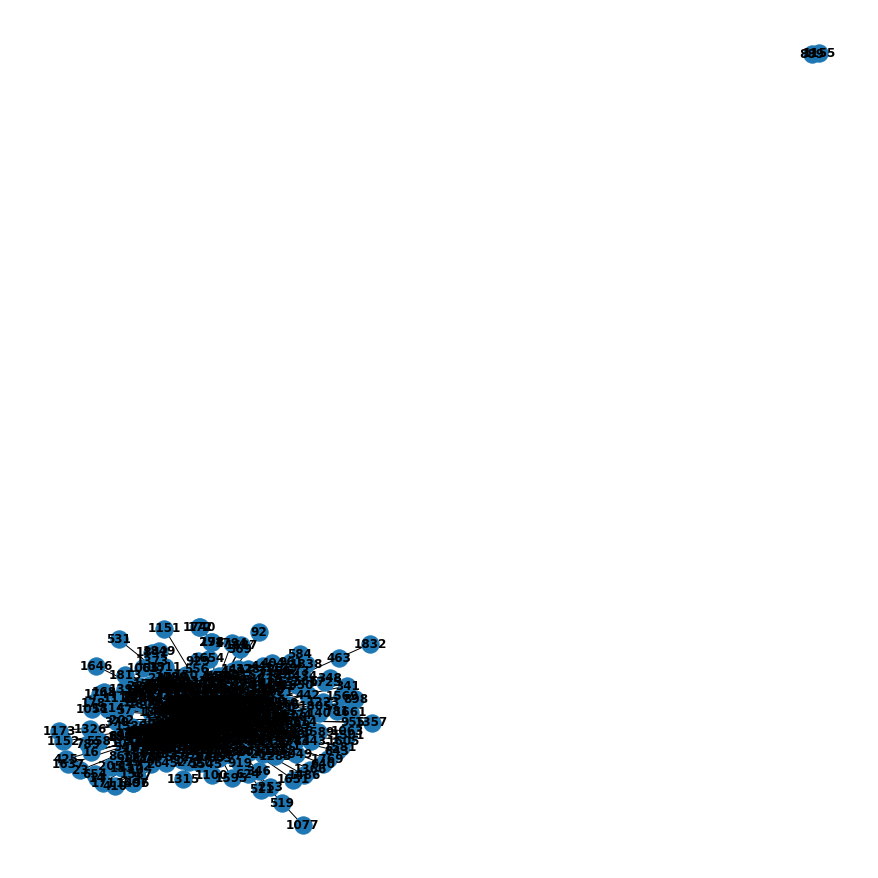

In [7]:
plt.figure(figsize=(12,12)) 
nx.draw(G, with_labels=True, font_weight='bold')

In [8]:
pos_pb = nx.spring_layout(G)

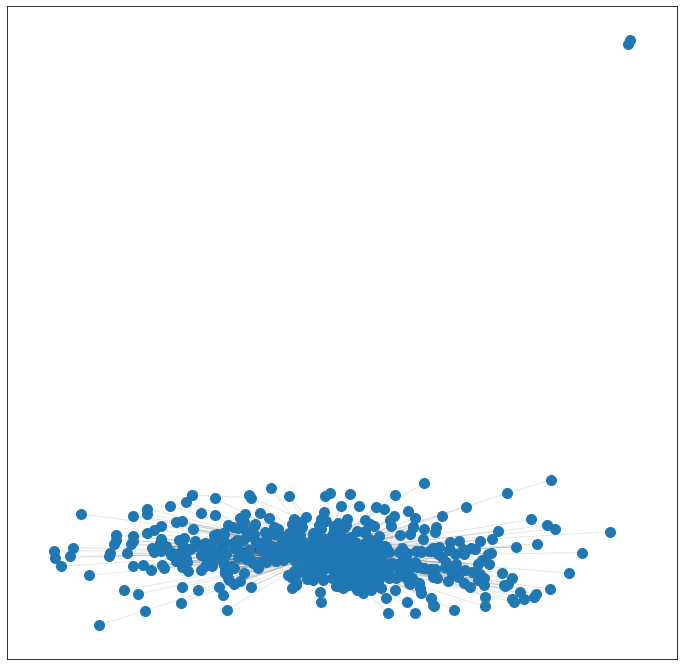

In [9]:
plt.figure(figsize=(12,12))
nodes = nx.draw_networkx_nodes (G , pos = pos_pb, node_size=100)
edges = nx.draw_networkx_edges (G , pos = pos_pb, alpha = 0.1)

# DROP THE 2 DISCONNECTED NODES 

In [10]:
G.remove_node("1155")

In [11]:
G.remove_node("889")

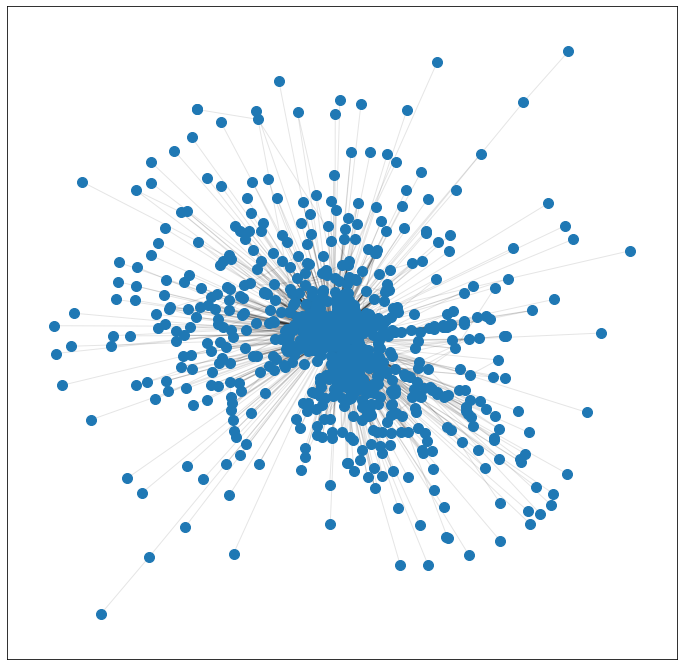

In [12]:
plt.figure(figsize=(12,12))
nodes = nx.draw_networkx_nodes (G , pos = pos_pb, node_size=100)
edges = nx.draw_networkx_edges (G , pos = pos_pb, alpha = 0.1)

In [39]:
G.degree()

DegreeView({'1': 2, '47': 40, '832': 9, '2': 1, '679': 27, '3': 2, '424': 6, '1688': 12, '4': 1, '685': 205, '6': 2, '7': 1, '8': 2, '1217': 44, '1729': 17, '9': 1, '91': 39, '11': 3, '1494': 6, '12': 4, '227': 21, '505': 131, '509': 33, '13': 1, '15': 1, '16': 2, '844': 48, '17': 1, '19': 1, '20': 7, '70': 60, '88': 172, '464': 19, '1131': 13, '1262': 15, '1652': 8, '1739': 9, '21': 1, '22': 1, '23': 1, '24': 1, '27': 2, '1416': 14, '29': 97, '78': 13, '114': 314, '117': 80, '134': 51, '169': 166, '173': 18, '206': 204, '296': 116, '300': 93, '311': 203, '317': 196, '381': 132, '391': 254, '403': 76, '432': 147, '435': 252, '489': 41, '526': 211, '534': 83, '576': 34, '609': 100, '610': 97, '619': 111, '691': 111, '709': 299, '716': 133, '727': 86, '731': 184, '760': 131, '766': 291, '880': 8, '899': 120, '902': 187, '918': 147, '978': 184, '982': 231, '989': 173, '994': 189, '1022': 195, '1029': 101, '1066': 130, '1101': 101, '1109': 75, '1200': 296, '1246': 19, '1252': 244, '1258': 

In [29]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degree_sequence

[314,
 299,
 296,
 292,
 291,
 274,
 273,
 269,
 267,
 261,
 254,
 252,
 245,
 244,
 240,
 231,
 219,
 214,
 211,
 205,
 204,
 203,
 202,
 198,
 196,
 195,
 195,
 193,
 193,
 190,
 189,
 189,
 187,
 187,
 184,
 184,
 183,
 180,
 180,
 176,
 176,
 173,
 173,
 172,
 169,
 166,
 166,
 165,
 163,
 162,
 159,
 154,
 154,
 153,
 149,
 147,
 147,
 145,
 143,
 143,
 141,
 140,
 139,
 138,
 137,
 136,
 133,
 133,
 132,
 132,
 131,
 131,
 131,
 130,
 128,
 126,
 123,
 123,
 122,
 121,
 121,
 120,
 119,
 118,
 118,
 116,
 115,
 112,
 112,
 111,
 111,
 111,
 110,
 109,
 109,
 108,
 107,
 105,
 104,
 102,
 101,
 101,
 100,
 100,
 100,
 100,
 100,
 99,
 98,
 97,
 97,
 97,
 95,
 94,
 94,
 93,
 93,
 87,
 86,
 84,
 83,
 83,
 83,
 81,
 80,
 77,
 76,
 76,
 75,
 75,
 75,
 75,
 74,
 73,
 73,
 72,
 72,
 72,
 71,
 71,
 70,
 70,
 69,
 69,
 69,
 68,
 67,
 67,
 67,
 66,
 65,
 64,
 64,
 63,
 62,
 61,
 60,
 60,
 60,
 60,
 60,
 60,
 59,
 59,
 59,
 58,
 58,
 55,
 55,
 55,
 55,
 54,
 54,
 54,
 54,
 53,
 51,
 51,
 51

In [31]:
degreeCount = collections.Counter(degree_sequence)
degreeCount

Counter({314: 1,
         299: 1,
         296: 1,
         292: 1,
         291: 1,
         274: 1,
         273: 1,
         269: 1,
         267: 1,
         261: 1,
         254: 1,
         252: 1,
         245: 1,
         244: 1,
         240: 1,
         231: 1,
         219: 1,
         214: 1,
         211: 1,
         205: 1,
         204: 1,
         203: 1,
         202: 1,
         198: 1,
         196: 1,
         195: 2,
         193: 2,
         190: 1,
         189: 2,
         187: 2,
         184: 2,
         183: 1,
         180: 2,
         176: 2,
         173: 2,
         172: 1,
         169: 1,
         166: 2,
         165: 1,
         163: 1,
         162: 1,
         159: 1,
         154: 2,
         153: 1,
         149: 1,
         147: 2,
         145: 1,
         143: 2,
         141: 1,
         140: 1,
         139: 1,
         138: 1,
         137: 1,
         136: 1,
         133: 2,
         132: 2,
         131: 3,
         130: 1,
         128: 

In [35]:
degreeCount.items()

dict_items([(314, 1), (299, 1), (296, 1), (292, 1), (291, 1), (274, 1), (273, 1), (269, 1), (267, 1), (261, 1), (254, 1), (252, 1), (245, 1), (244, 1), (240, 1), (231, 1), (219, 1), (214, 1), (211, 1), (205, 1), (204, 1), (203, 1), (202, 1), (198, 1), (196, 1), (195, 2), (193, 2), (190, 1), (189, 2), (187, 2), (184, 2), (183, 1), (180, 2), (176, 2), (173, 2), (172, 1), (169, 1), (166, 2), (165, 1), (163, 1), (162, 1), (159, 1), (154, 2), (153, 1), (149, 1), (147, 2), (145, 1), (143, 2), (141, 1), (140, 1), (139, 1), (138, 1), (137, 1), (136, 1), (133, 2), (132, 2), (131, 3), (130, 1), (128, 1), (126, 1), (123, 2), (122, 1), (121, 2), (120, 1), (119, 1), (118, 2), (116, 1), (115, 1), (112, 2), (111, 3), (110, 1), (109, 2), (108, 1), (107, 1), (105, 1), (104, 1), (102, 1), (101, 2), (100, 5), (99, 1), (98, 1), (97, 3), (95, 1), (94, 2), (93, 2), (87, 1), (86, 1), (84, 1), (83, 3), (81, 1), (80, 1), (77, 1), (76, 2), (75, 4), (74, 1), (73, 2), (72, 3), (71, 2), (70, 2), (69, 3), (68, 1), 

In [33]:
deg, cnt = zip(*degreeCount.items())
deg, cnt

((314,
  299,
  296,
  292,
  291,
  274,
  273,
  269,
  267,
  261,
  254,
  252,
  245,
  244,
  240,
  231,
  219,
  214,
  211,
  205,
  204,
  203,
  202,
  198,
  196,
  195,
  193,
  190,
  189,
  187,
  184,
  183,
  180,
  176,
  173,
  172,
  169,
  166,
  165,
  163,
  162,
  159,
  154,
  153,
  149,
  147,
  145,
  143,
  141,
  140,
  139,
  138,
  137,
  136,
  133,
  132,
  131,
  130,
  128,
  126,
  123,
  122,
  121,
  120,
  119,
  118,
  116,
  115,
  112,
  111,
  110,
  109,
  108,
  107,
  105,
  104,
  102,
  101,
  100,
  99,
  98,
  97,
  95,
  94,
  93,
  87,
  86,
  84,
  83,
  81,
  80,
  77,
  76,
  75,
  74,
  73,
  72,
  71,
  70,
  69,
  68,
  67,
  66,
  65,
  64,
  63,
  62,
  61,
  60,
  59,
  58,
  55,
  54,
  53,
  51,
  50,
  49,
  48,
  47,
  46,
  45,
  44,
  43,
  42,
  41,
  40,
  39,
  38,
  37,
  36,
  35,
  34,
  33,
  32,
  31,
  30,
  29,
  28,
  27,
  26,
  25,
  24,
  23,
  22,
  21,
  20,
  19,
  18,
  17,
  16,
  15,
  14,
  13,
  1

## Degree distribution

#### Histogram

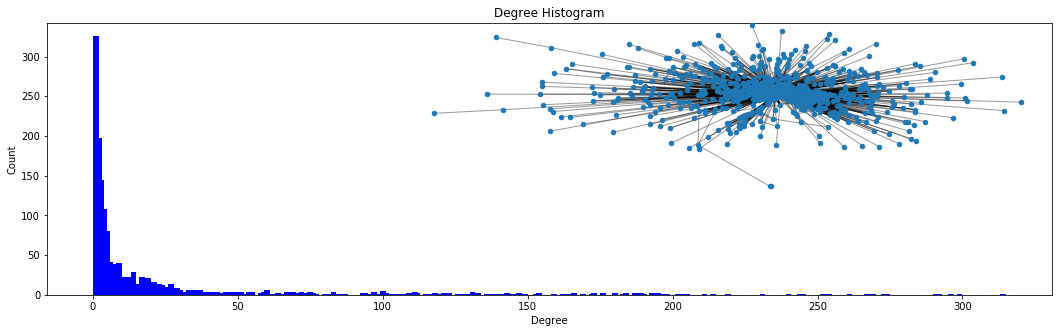

In [57]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())



fig, ax = plt.subplots(figsize=(18,5))
plt.bar(deg, cnt, width=2.0, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


#draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

We can see from the histogram that the majority of nodes have a small degree. In particular, 326 nodes have degree = 1 and 197 nodes have degree = 2. So roughly one third of all nodes are only connected to 1 or 2 other nodes. However, there are a small group of nodes at the centre of the network with a high degree: 23 nodes have a degree of >200. With the highest degree of 314. 

#### Degree Rank Plot

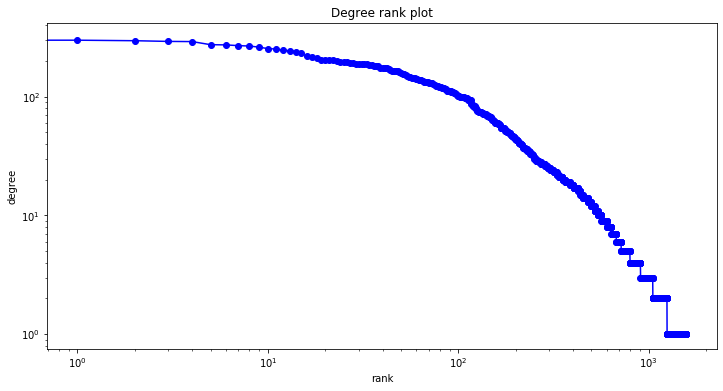

In [16]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

dmax = max(degree_sequence)

fig, ax = plt.subplots(figsize=(12, 6))
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
#plt.axes([0.45, 0.45, 0.45, 0.45])
#Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
#pos = nx.spring_layout(Gcc)
#plt.axis('off')
#nx.draw_networkx_nodes(Gcc, pos, node_size=20)
#nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()

Again, by examining the degree-rank (loglog) plot we can see that several nodes only have degree 1 (horizontal step bottom right), several nodes have degrees of 2, 3, 4, 5, 6 although fewer at each step. We can then see a smooth curve showing there are many nodes with degree size 10 to 100 evenly distributed within this range. Above degree size of 100, the distribution begins to spread out until we reach a maximum degree size of 314.

To find the adjacency matrix (to show which nodes a given node is directly connected to):

In [14]:
A = nx.adj_matrix(G)

In [15]:
A.shape

(1572, 1572)

To find the Laplacian matrix:

In [21]:
L = nx.laplacian_matrix(G)

# Degree

To calculate the degree centrality of each node (how many links each node has normalized by dividing by the maximum possible degree):

In [41]:
DC=nx.degree_centrality(G)

To identify the 10 nodes with highest degree centrality:

In [42]:
dict(Counter(DC).most_common(10))

{'114': 0.19961856325492688,
 '709': 0.19008264462809918,
 '1200': 0.18817546090273363,
 '877': 0.1856325492689129,
 '766': 0.18499682136045772,
 '389': 0.17418944691671964,
 '500': 0.17355371900826447,
 '1068': 0.17101080737444374,
 '711': 0.1697393515575334,
 '1016': 0.1659249841068023}

As our network is undirected, the following two measures are not relevant:

In [24]:
#IDC=nx.in_degree_centrality(G)

In [25]:
#ODC=nx.out_degree_centrality(G)

# Closeness

To compute closeness centrality (average distance from a given node to all other nodes, normalised by the sum of minimum possible distances):

In [43]:
CC=nx.closeness_centrality(G)

To identify the 10 nodes with highest closeness centrality:

In [44]:
dict(Counter(CC).most_common(10))

{'114': 0.49777999457856403,
 '877': 0.49464140697088077,
 '1068': 0.49417402926350673,
 '389': 0.49000704025972325,
 '709': 0.48939567776407794,
 '766': 0.4851584857488045,
 '982': 0.48500851403759937,
 '1200': 0.4838120699696682,
 '500': 0.48128912359252574,
 '711': 0.4806993084900839}

# Betweeness

To compute betweenness centrality (measure of the influence of a node over the flow of information between every pair of ndoes):

In [45]:
BC=nx.betweenness_centrality(G)

To identify the 10 nodes with highest betweenness centrality:

In [46]:
dict(Counter(BC).most_common(10))

{'88': 0.21612697041610074,
 '505': 0.0910798547774605,
 '877': 0.05784203528825084,
 '766': 0.05761920149221005,
 '1016': 0.05269497029630838,
 '1433': 0.05262689939317822,
 '685': 0.05160207925993114,
 '389': 0.05058791867337552,
 '114': 0.04634170713506602,
 '1068': 0.042751395077417216}

In [48]:
EBC=nx.edge_betweenness_centrality(G)

To identify the 10 edges with highest betweenness centrality:

In [49]:
dict(Counter(EBC).most_common(10))

{('47', '88'): 0.020632806664735933,
 ('70', '1433'): 0.015639356547341905,
 ('88', '1016'): 0.012150294115807932,
 ('505', '114'): 0.01072903540298153,
 ('1822', '921'): 0.01047117166286991,
 ('505', '766'): 0.010301482595725466,
 ('505', '877'): 0.009765937626108535,
 ('679', '88'): 0.009708576637158801,
 ('1240', '802'): 0.00963160713688633,
 ('88', '709'): 0.009578160413943628}

# Eigenvector Centrality

To find the eigenvector_centrality of each node (the importance of each node based on the importance of nodes it is connected to).

High Eigenvector centrality identifies nodes that are surrounded by other nodes with high eigenvector centrality. This measure helps to locate groups of interconnected nodes with high prestige.

In [52]:
E_CT=nx.eigenvector_centrality(G)

To identify the 10 nodes with highest eigenvector centrality score:

In [54]:
dict(Counter(E_CT).most_common(10))

{'1200': 0.11825493026777034,
 '114': 0.11539964929681931,
 '435': 0.11502842517245333,
 '709': 0.11325891582359723,
 '1068': 0.11309294644137256,
 '391': 0.1119492638186437,
 '1252': 0.11088870154947708,
 '711': 0.11029295687227372,
 '500': 0.10776159003989608,
 '206': 0.10727666917403335}

To find Katz centrality (relative influence of a node within a network by measuring the number of the immediate neighbours and also all other nodes in the network that connect to the node under consideration through these immediate neighbors):

In [ ]:
#KATZ_C=nx.katz_centrality(G) Will not compute - perhaps because of two unconnected nodes?

In [74]:
KATZ_C_np=nx.katz_centrality_numpy(G)

To identify the 10 nodes with highest KATZ centrality score:

In [83]:
dict(Counter(KATZ_C_np).most_common(10))

{'875': 0.15468816341187885,
 '1411': 0.13959673020181584,
 '452': 0.1217266507300894,
 '1374': 0.11709962504730172,
 '246': 0.11522402587640815,
 '435': 0.11475787802141299,
 '344': 0.11467879401572595,
 '731': 0.10987594598693455,
 '1462': 0.10714211473123166,
 '1611': 0.09696002019335999}

# Communicability

In [17]:
C=nx.communicability(G) #Will not compute - perhaps because of two unconnected nodes?

KeyboardInterrupt: 

In [76]:
CExp=nx.communicability_exp(G)

In [86]:
CCentrality=nx.communicability_centrality(G)

AttributeError: module 'networkx' has no attribute 'communicability_centrality'

In [81]:
CCentrality_exp=nx.communicability_centrality_exp(G)

AttributeError: module 'networkx' has no attribute 'communicability_centrality_exp'

The below may not work because of the two unconnected nodes?

In [18]:
CCentrality_exp=nx.communicability_betweenness_centrality(G)

KeyboardInterrupt: 

In [ ]:
EI=nx.estrada_index(G)

# PageRank

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links

In [24]:
PR=nx.pagerank(G)
PR

{'1': 9.612536068303489e-05,
 '47': 0.003182666663830709,
 '832': 0.00024323828497879832,
 '2': 9.545266769541031e-05,
 '679': 0.0017372419907576982,
 '3': 0.00043594711684556795,
 '424': 0.0003167371967398765,
 '1688': 0.001710557280689875,
 '4': 9.532501502855812e-05,
 '685': 0.003923952365356898,
 '6': 0.00010008568935048043,
 '7': 0.00011232282989811025,
 '8': 9.559598016627725e-05,
 '1217': 0.002304552466707107,
 '1729': 0.0002876488884065117,
 '9': 9.546488669606212e-05,
 '91': 0.0015425722266340035,
 '11': 0.00011406649200461815,
 '1494': 0.00032371251161499796,
 '12': 9.634961887297912e-05,
 '227': 0.0011010008361702645,
 '505': 0.007247881095394389,
 '509': 0.00037014320538208387,
 '13': 9.669242026212701e-05,
 '15': 9.788828326500411e-05,
 '16': 9.541690405985203e-05,
 '844': 0.0004872197277049377,
 '17': 9.544439664450388e-05,
 '19': 9.653112555311715e-05,
 '20': 0.00013374563952135991,
 '70': 0.002870517488540453,
 '88': 0.022148905066405135,
 '464': 0.0001878816984912929,


To find the 10 nodes with a higher PageRank:

In [25]:
dict(Counter(PR).most_common(10))

{'114': 0.036546895456913676,
 '1200': 0.028016991944619228,
 '877': 0.026271551839596462,
 '389': 0.023899363563229872,
 '391': 0.02307136149385798,
 '1433': 0.022617722978794302,
 '766': 0.02255921558084575,
 '88': 0.022148905066405135,
 '711': 0.01787068035997466,
 '1437': 0.01738146475452634}

# Clustering

The transitivity ratio and the clustering coefficient are the two most popular statistics that measure the number of triangles in a network.

First, we compute the number of triangles that include a node as one vertex.

In [6]:
TRIANGLES=nx.triangles(G)

In [7]:
TRIANGLES

{'1': 1,
 '47': 53,
 '832': 18,
 '2': 0,
 '679': 36,
 '3': 1,
 '424': 7,
 '1688': 16,
 '4': 0,
 '685': 3268,
 '6': 1,
 '7': 0,
 '8': 1,
 '1217': 255,
 '1729': 83,
 '9': 0,
 '91': 221,
 '11': 2,
 '1494': 5,
 '12': 5,
 '227': 88,
 '505': 644,
 '509': 127,
 '13': 0,
 '15': 0,
 '16': 1,
 '844': 401,
 '17': 0,
 '19': 0,
 '20': 13,
 '70': 216,
 '88': 1370,
 '464': 77,
 '1131': 27,
 '1262': 70,
 '1652': 21,
 '1739': 19,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '27': 1,
 '1416': 45,
 '29': 2509,
 '78': 40,
 '114': 9036,
 '117': 1831,
 '134': 768,
 '169': 6728,
 '173': 35,
 '206': 8095,
 '296': 3776,
 '300': 2015,
 '311': 7841,
 '317': 7218,
 '381': 4525,
 '391': 8639,
 '403': 1330,
 '432': 5023,
 '435': 9110,
 '489': 508,
 '526': 6327,
 '534': 2057,
 '576': 483,
 '609': 2507,
 '610': 2874,
 '619': 3293,
 '691': 3604,
 '709': 8755,
 '716': 4582,
 '727': 1955,
 '731': 7313,
 '760': 4802,
 '766': 5741,
 '880': 12,
 '899': 3207,
 '902': 7024,
 '918': 5432,
 '978': 6987,
 '982': 7639,
 '989': 6331,

To find the 10 nodes with more triangles:

In [8]:
dict(Counter(TRIANGLES).most_common(10))

{'1200': 9442,
 '435': 9110,
 '114': 9036,
 '1068': 8822,
 '709': 8755,
 '391': 8639,
 '1252': 8418,
 '711': 8348,
 '206': 8095,
 '389': 8040}

The transitivity coefficient of a network, is the ratio of the number of loops of length three and the number of paths of length two. Hence, it is the frequency of loops of length three in the network.

In [9]:
TRANSITIVITY=nx.transitivity(G)

In [10]:
TRANSITIVITY

0.38414344664491556

For weighted graphs, the clustering used here is defined as the geometric average of the subgraph edge weights.

In [11]:
CLUSTERING=nx.clustering(G)

In [12]:
CLUSTERING

{'1': 1.0,
 '47': 0.06794871794871794,
 '832': 0.5,
 '2': 0,
 '679': 0.10256410256410256,
 '3': 1.0,
 '424': 0.4666666666666667,
 '1688': 0.24242424242424243,
 '4': 0,
 '685': 0.1562888570062171,
 '6': 1.0,
 '7': 0,
 '8': 1.0,
 '1217': 0.26955602536997886,
 '1729': 0.6102941176470589,
 '9': 0,
 '91': 0.2982456140350877,
 '11': 0.6666666666666666,
 '1494': 0.3333333333333333,
 '12': 0.8333333333333334,
 '227': 0.41904761904761906,
 '505': 0.07563123899001761,
 '509': 0.24053030303030304,
 '13': 0,
 '15': 0,
 '16': 1.0,
 '844': 0.3554964539007092,
 '17': 0,
 '19': 0,
 '20': 0.6190476190476191,
 '70': 0.12203389830508475,
 '88': 0.09315925472596219,
 '464': 0.4502923976608187,
 '1131': 0.34615384615384615,
 '1262': 0.6666666666666666,
 '1652': 0.75,
 '1739': 0.5277777777777778,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '27': 1.0,
 '1416': 0.4945054945054945,
 '29': 0.5388745704467354,
 '78': 0.5128205128205128,
 '114': 0.18387904194053845,
 '117': 0.5794303797468354,
 '134': 0.602352941176

In [13]:
dict(Counter(CLUSTERING).most_common(10))

{'1': 1.0,
 '3': 1.0,
 '6': 1.0,
 '8': 1.0,
 '16': 1.0,
 '27': 1.0,
 '76': 1.0,
 '355': 1.0,
 '677': 1.0,
 '757': 1.0}

Compute the average clustering coefficient for the graph G.

In [14]:
A_CLUSTERING=nx.average_clustering(G)

In [15]:
A_CLUSTERING

0.5041525392095769

As we see there exist a difference between the clustering and the transitivity coefficients, but they give us a clue  on the number of triangles our network has.

# Shortest paths

We compute shortest paths in the graph.

In [18]:
G.remove_node("889")
G.remove_node("1155")

In [ ]:
SP=nx.shortest_path(G)

In [ ]:
A_SP=nx.all_shortest_paths(G)

In [ ]:
SPL=nx.shortest_path_lengths(G)

We return the average shortest path length, once we have deleted the 2 isolated nodes.

In [19]:
ASPL=nx.average_shortest_path_length(G)
ASPL

3.1151638395019137

We can show that a path exist between 2 different nodes.

In [20]:
HAS_PATH=nx.has_path(G,"1832","1077")
HAS_PATH

True

Or that a path doesn't exist

In [21]:
G = nx.read_weighted_edgelist(r'USairport_2010.dl')

In [22]:
HAS_PATH=nx.has_path(G,"1155","1077")
HAS_PATH

False